In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy.stats import pearsonr
import plotly
import chart_studio.plotly 
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
df = df[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 
         'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [13]:
df.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## 2021 World Happiness Index by Country

In [4]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = df['Country name'],
        locationmode = "country names",
        z = df['Ladder score'],
        text = df['Country name'],
        colorbar = {'title' : 'Happiness Index'},)
    
layout=dict(title_text = '2021 World Happiness Index by Country')
fig = go.Figure(data=data,layout=layout) 
chart_studio.plotly.iplot(fig, filename='choropleth')

## Happiness regions
####    - North America and ANZ
####    - Western Europe

Text(0.5, 1.0, 'Happiness by regions')

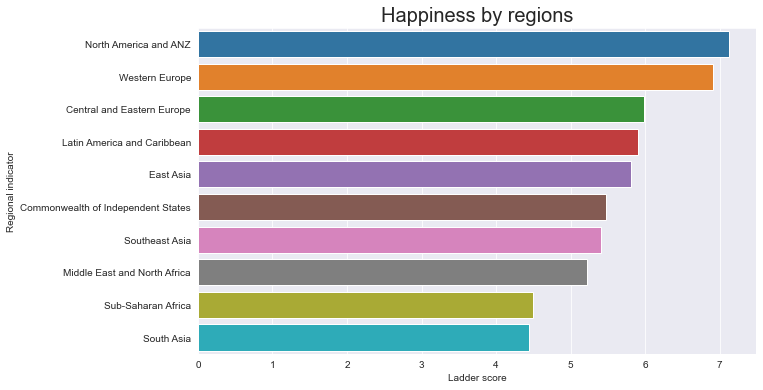

In [5]:
df_region = df.groupby('Regional indicator')['Ladder score', 'Logged GDP per capita', 'Social support', 
                                             'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
                                             'Perceptions of corruption'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(y='Regional indicator', x='Ladder score', data=df_region.sort_values(by='Ladder score', ascending=False))
plt.title('Happiness by regions', fontsize=20)

## Top 5 Happiness Countries
#### - Finland
#### - Denmark
#### - Switzerland
#### - Iceland
#### - Netherlands

Text(0.5, 1.0, 'Top 5 Happiness Country in 2021')

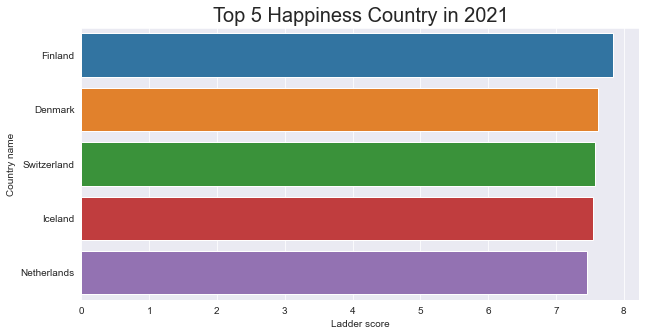

In [6]:
df_country = df.sort_values(by='Ladder score', ascending=False).head()

plt.figure(figsize=(10, 5))
sns.barplot(x = df_country['Ladder score'], y = df_country['Country name']);
plt.title('Top 5 Happiness Country in 2021', fontsize=20)

## What Makes a Nation Happy


### Strong Economic

p: 5.2280890938959975e-33


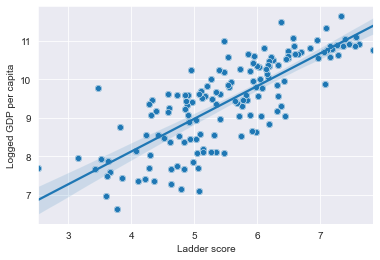

In [7]:
# p < 0.05, reject the hypothesis that 'Logged GDP per capita' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Logged GDP per capita'])
print('p:', p)

sns.regplot(x='Ladder score', y='Logged GDP per capita', data=df)
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', data=df);

### Good Social Support

p: 6.051516845658725e-29


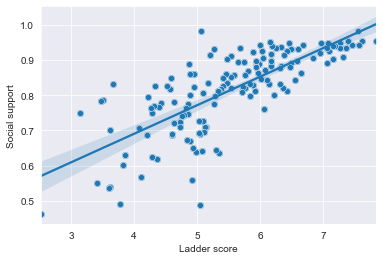

In [8]:
# p < 0.05, reject the hypothesis that 'Social support' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Social support'])
print('p:', p)

sns.regplot(x='Ladder score', y='Social support', data=df)
sns.scatterplot(x='Ladder score', y='Social support', data=df);

### Long Healthy Life Expectancy

p: 2.961721261535451e-30


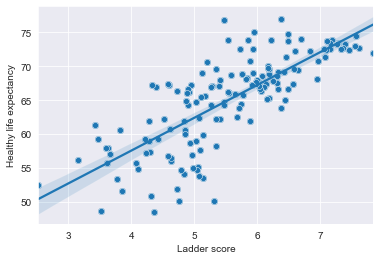

In [9]:
# p < 0.05, reject the hypothesis that 'Health life expectancy' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Healthy life expectancy'])
print('p:', p)

sns.regplot(x='Ladder score', y='Healthy life expectancy', data=df)
sns.scatterplot(x='Ladder score', y='Healthy life expectancy', data=df);

### Freedom to Make Life Choices

p: 2.054573941671343e-16


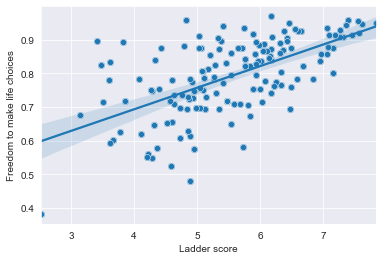

In [10]:
# p < 0.05, reject the hypothesis that 'Freedom to make life choices' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Freedom to make life choices'])
print('p:', p)

sns.regplot(x='Ladder score', y='Freedom to make life choices', data=df);
sns.scatterplot(x='Ladder score', y='Freedom to make life choices', data=df);

### Low Perceptions of Corruption

p: 8.881143481846634e-08


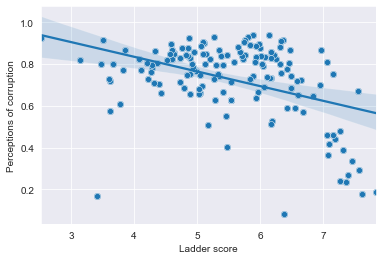

In [11]:
# p < 0.05, reject the hypothesis that 'Perceptions of corruption' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Perceptions of corruption'])
print('p:', p)

sns.regplot(x='Ladder score', y='Perceptions of corruption', data=df)
sns.scatterplot(x='Ladder score', y='Perceptions of corruption', data=df);

### No strong link between generosity and happiness

p: 0.8294124840156312


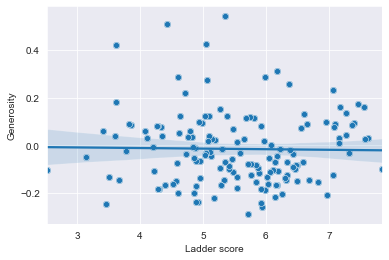

In [12]:
# p > 0.05, cannot reject the hypothesis that 'Generosity' has no relationship to 'Ladder score'
r, p = pearsonr(df['Ladder score'], df['Generosity'])
print('p:', p)

sns.regplot(x='Ladder score', y='Generosity', data=df)
sns.scatterplot(x='Ladder score', y='Generosity', data=df);